<a href="https://colab.research.google.com/github/tavochopadron-cyber/inteligencia-artificial/blob/main/Exposicion/Copia_de_expocicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multicapa
## Integrantes  
## equipo 6

In [10]:
import numpy as np
import pandas as pd

# ========== CONJUNTO DE DATOS ==========
# Generar dataset de 500 prospectos para Grandes Ligas de Béisbol
n_muestras = 500

# Habilidades de bateo (rango competitivo): 70-100
bateo = np.random.randint(70, 101, (n_muestras, 6))

# Habilidades defensivas (rango competitivo): 65-95
defensa = np.random.randint(65, 96, (n_muestras, 6))

# Habilidades físicas y mentales (rango competitivo): 60-90
fisico_mental = np.random.randint(60, 91, (n_muestras, 6))

# Nombres de columnas específicas para béisbol de Grandes Ligas
columnas = [
    # Habilidades de bateo esenciales
    'potencia_bateo', 'contacto_bate', 'vision_zona', 'disciplina_plato', 'velocidad_bases', 'clutch_hitting',
    # Habilidades defensivas por posición
    'brazo_campo_externo', 'brazo_infield', 'range_defensivo', 'agarre_flys', 'velocidad_reaccion', 'doble_play',
    # Habilidades físicas y mentales
    'velocidad_carrera', 'resistencia_fisica', 'fuerza_brazo', 'mentalidad_competitiva', 'trabajo_equipo', 'liderazgo_diamante'
]

# Crear DataFrame con los 500 prospectos de béisbol
df = pd.DataFrame(np.concatenate([bateo, defensa, fisico_mental], axis=1), columns=columnas)

# ========== PREPARACIÓN DE ETIQUETAS ==========
# Calcular promedio por grupo y promedio total
prom_bateo = df[['potencia_bateo', 'contacto_bate', 'vision_zona', 'disciplina_plato', 'velocidad_bases', 'clutch_hitting']].mean(axis=1)
prom_defensivas = df[['brazo_campo_externo', 'brazo_infield', 'range_defensivo', 'agarre_flys', 'velocidad_reaccion', 'doble_play']].mean(axis=1)
prom_físicasymentales = df[['velocidad_carrera', 'resistencia_fisica', 'fuerza_brazo', 'mentalidad_competitiva', 'trabajo_equipo', 'liderazgo_diamante']].mean(axis=1)

# Promedio total = promedio de los 3 promedios
prom_total = (prom_bateo + prom_defensivas + prom_físicasymentales) / 3

# Etiqueta: 1 = apto si promedio total > 76
y = (prom_total > 76).astype(int)

# one-hot encoding: convierte [0,1] en [[1,0], [0,1]]
y = pd.get_dummies(y).values


In [3]:
# ========== DIVISIÓN DE DATOS ==========
from sklearn.model_selection import train_test_split
# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)


In [4]:
# ========== escalonar ==========
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Estandarizar datos para mejor rendimiento de la red
X_train = scaler.fit_transform(X_train)  # Aprende y transforma entrenamiento
X_test = scaler.transform(X_test)        # Aplica misma transformación a prueba

In [5]:
# ========== RED NEURONAL ==========
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear modelo de red neuronal secuencial
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Capa entrada + oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(16, activation='relu'),  # Capa oculta 3
    Dense(2, activation='softmax') # Capa salida (2)
])

# Configurar optimizador Adam
adam = Adam(learning_rate=0.001)

# Compilar modelo: definir cómo aprende
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# ========== ENTRENAMIENTO ==========
history = modelo.fit(
    X_train, y_train,
    epochs=85,           # 100 pasadas completas por los datos
    batch_size=32,        # Procesa 32 muestras por lote
    validation_data=(X_test, y_test),  # Datos para validar durante entrenamiento
    verbose=1             # Muestra progreso
)


Epoch 1/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.0436 - loss: 1.2892 - val_accuracy: 0.3700 - val_loss: 0.7596
Epoch 2/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6574 - loss: 0.6348 - val_accuracy: 0.9800 - val_loss: 0.3950
Epoch 3/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9603 - loss: 0.3557 - val_accuracy: 0.9900 - val_loss: 0.2014
Epoch 4/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9647 - loss: 0.2196 - val_accuracy: 0.9900 - val_loss: 0.1053
Epoch 5/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9769 - loss: 0.1381 - val_accuracy: 0.9900 - val_loss: 0.0662
Epoch 6/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9690 - loss: 0.1337 - val_accuracy: 0.9900 - val_loss: 0.0513
Epoch 7/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9897 - loss: 0.0610 - val_accuracy: 0.9900 - val_loss: 0.0444
Epoch 8/85
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9778 - loss: 0.0876 - val_accuracy: 0.9900 - val_

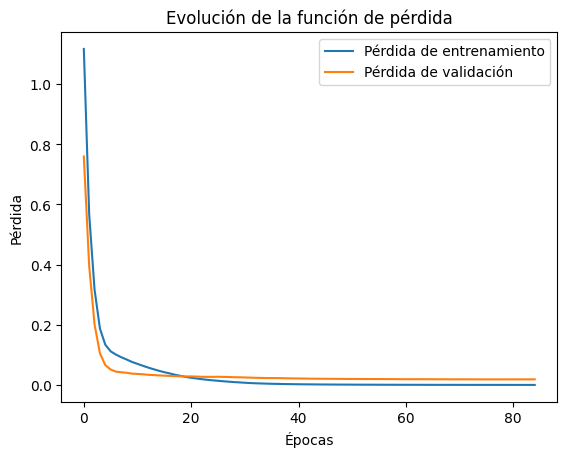

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9908 - loss: 0.0170     

Loss: 0.0188  |  Accuracy: 0.9900


In [7]:
# ========== MÉTRICAS Y EVALUACIÓN ==========
import matplotlib.pyplot as plt

# Graficar evolución de la pérdida durante entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

# Evaluar modelo final con datos de prueba
loss, acc = modelo.evaluate(X_test, y_test)
print(f"\nLoss: {loss:.4f}  |  Accuracy: {acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


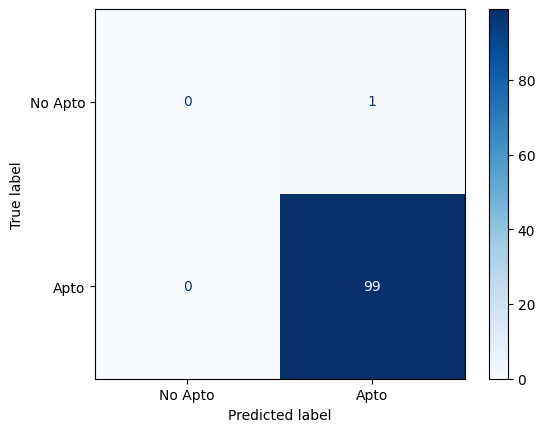


Sensitivity (Recall) por clase:
No Apto: 0.00
Apto: 1.00


In [8]:
# ========== MATRIZ DE CONFUSIÓN ==========
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Predecir con el modelo entrenado
pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)  # Convertir probabilidades a clases (0 o 1)
y_true = np.argmax(y_test, axis=1)  # Convertir one-hot a clases

# Crear y mostrar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

# Calcular sensibilidad (recall) por clase
sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [9]:
# ========== ENCONTRAR AL PROXIMO ASPIRANTE ==========

# Usar solo los datos de prueba (X_test, y_test)
# Primero necesitamos revertir el escalado para obtener los valores originales
X_test_original = scaler.inverse_transform(X_test)

# Crear DataFrame con los datos de test originales
df_test = pd.DataFrame(X_test_original, columns=columnas)

# Calcular promedio total de habilidades para cada candidato en TEST
promedio_habilidades_test = df_test.mean(axis=1)

# Encontrar el índice del candidato con mayor promedio en TEST
indice_mejor_test = promedio_habilidades_test.idxmax()

# Obtener el candidato más apto del conjunto de TEST
mejor_candidato_test = df_test.loc[indice_mejor_test]

# Mostrar resultados del MEJOR en TEST
print(f" MEJOR CANDIDATO EN DATOS DE PRUEBA:")
print(f" Puntuación Total: {promedio_habilidades_test.max():.1f}")
print(f" Clasificación Real: {'Apto' if y_test[indice_mejor_test].argmax() == 1 else 'No Apto'}")
print(f" Predicción del Modelo: {'Apto' if modelo.predict(X_test)[indice_mejor_test].argmax() == 1 else 'No Apto'}")

print("\n HABILIDADES DESTACADAS:")
print(f"   Bateo: {df_test[['potencia_bateo', 'contacto_bate', 'vision_zona', 'disciplina_plato', 'velocidad_bases', 'clutch_hitting']].mean(axis=1)[indice_mejor_test]:.1f}")
print(f"   Defensa: {df_test[['brazo_campo_externo', 'brazo_infield', 'range_defensivo', 'agarre_flys', 'velocidad_reaccion', 'doble_play']].mean(axis=1)[indice_mejor_test]:.1f}")
print(f"   Físico/Mental: {df_test[['velocidad_carrera', 'resistencia_fisica', 'fuerza_brazo', 'mentalidad_competitiva', 'trabajo_equipo', 'liderazgo_diamante']].mean(axis=1)[indice_mejor_test]:.1f}")

 MEJOR CANDIDATO EN DATOS DE PRUEBA:
 Puntuación Total: 85.8
 Clasificación Real: Apto
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
 Predicción del Modelo: Apto

 HABILIDADES DESTACADAS:
   Bateo: 88.8
   Defensa: 86.7
   Físico/Mental: 82.0
